# COVID Global ScratchPad 

Do the same using Global data from John Hopkins University

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd
import requests

dfc_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfd_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

dfc_g = dfc_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfc_graw.columns[-1], ascending=False)
dfc_g = dfc_g.transpose()  
dfc_g.index = pd.to_datetime(dfc_g.index)

dfd_g = dfd_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfd_graw.columns[-1], ascending=False)
dfd_g = dfd_g.transpose().tail(40)  # last 40 days ?
dfd_g.index = pd.to_datetime(dfd_g.index) 
display('deaths',dfd_g.tail())
display('chg in deaths',dfd_g.tail().diff(axis=0))

#display('details of', dfd_g['Sudan'].tail(15), dfc_g['Sudan'].tail(15))


'deaths'

Country/Region,Italy,Spain,US,France,United Kingdom,China,Iran,Netherlands,Germany,Belgium,...,Grenada,Chad,Central African Republic,Rwanda,Saint Kitts and Nevis,Saint Vincent and the Grenadines,Cambodia,Burundi,Seychelles,Saint Lucia
2020-03-30,11591,7716,2978,3030,1411,3308,2757,865,645,513,...,0,0,0,0,0,0,0,0,0,0
2020-03-31,12428,8464,3873,3532,1793,3309,2898,1040,775,705,...,0,0,0,0,0,0,0,0,0,0
2020-04-01,13155,9387,4757,4043,2357,3316,3036,1175,920,828,...,0,0,0,0,0,0,0,0,0,0
2020-04-02,13915,10348,5926,5398,2926,3322,3160,1341,1107,1011,...,0,0,0,0,0,0,0,0,0,0
2020-04-03,14681,11198,7087,6520,3611,3326,3294,1490,1275,1143,...,0,0,0,0,0,0,0,0,0,0


'chg in deaths'

Country/Region,Italy,Spain,US,France,United Kingdom,China,Iran,Netherlands,Germany,Belgium,...,Grenada,Chad,Central African Republic,Rwanda,Saint Kitts and Nevis,Saint Vincent and the Grenadines,Cambodia,Burundi,Seychelles,Saint Lucia
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-31,837.0,748.0,895.0,502.0,382.0,1.0,141.0,175.0,130.0,192.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-01,727.0,923.0,884.0,511.0,564.0,7.0,138.0,135.0,145.0,123.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-02,760.0,961.0,1169.0,1355.0,569.0,6.0,124.0,166.0,187.0,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-03,766.0,850.0,1161.0,1122.0,685.0,4.0,134.0,149.0,168.0,132.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Highest Fatality Rates

compare the deaths / cases and find the top -- over a trend line


Country/Region,US,Italy,Spain,Germany,China,France,Iran,United Kingdom,Turkey,Switzerland,...,Bhutan,Gambia,Belize,Botswana,Saint Vincent and the Grenadines,Burundi,Malawi,Sierra Leone,Timor-Leste,Papua New Guinea
2020-03-30,1.84,11.39,8.77,0.96,4.02,6.71,6.64,6.28,1.55,2.25,...,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-31,2.06,11.75,8.82,1.08,4.02,6.69,6.50,7.04,1.58,2.61,...,0.0,25.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-01,2.23,11.90,9.02,1.18,4.03,7.00,6.38,7.89,1.77,2.75,...,0.0,25.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-02,2.43,12.07,9.23,1.31,4.03,9.01,6.26,8.56,1.96,2.85,...,0.0,25.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-03,2.57,12.25,9.39,1.40,4.03,10.00,6.19,9.33,2.03,3.01,...,0.0,25.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0


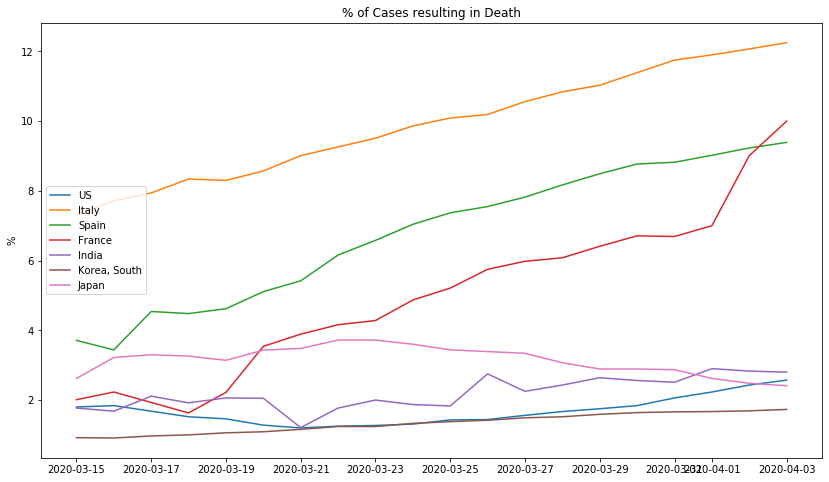

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df_gfat = dfc_g.copy()

for col in df_gfat.columns:
    df_gfat[col] = (dfd_g[col] / df_gfat[col]).mul(100).round(2)
df_gfat = df_gfat.fillna(0)
display(df_gfat.tail())
    
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('% of Cases resulting in Death')
ax1.set_ylabel('%')  # we already handled the x-label with ax1
countries = ['US','Italy','Spain','France','India','Korea, South','Japan']
lines2 = ax1.plot(df_gfat.tail(20).index, df_gfat.tail(20)[countries])
for c,line in enumerate(lines2):
    line.set_label(countries[c])    
ax1.legend(loc='center left')
plt.show()

plt.show()


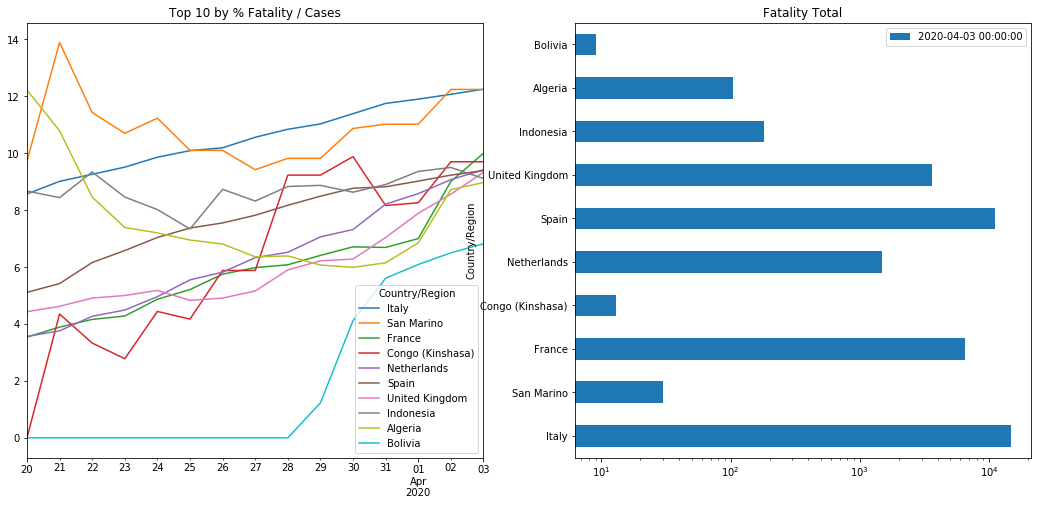

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# sorted only if death count > 100, must transpose first to filter by row
df_gfat2 = dfc_g.copy().transpose()
df_gfat2 = df_gfat2[df_gfat2[df_gfat2.columns[-1]] > 100].transpose()
# display(df_gfat2)

for col in df_gfat2.columns:
    df_gfat2[col] = (dfd_g[col] / df_gfat2[col]).mul(100).round(2)
df_gfat2 = df_gfat2.fillna(0)
df_gfat2 = df_gfat2.sort_values(df_gfat2.iloc[-1:,:].index.values[0], axis=1, ascending=False)   # column order seems to control legend order
# display(df_gfat2)

dfd_g2 = df_gfat2.copy()  # to hold deaths
for col in dfd_g2.columns:
    dfd_g2[col] = dfd_g[col]
dfd_g2 = dfd_g2.fillna(0)
# display(dfd_g2)

fig, axs = plt.subplots(1,2, sharex=False)

df_gfat2.iloc[:,0:10].tail(15).plot(figsize=(18,8), ax=axs[0], title='Top 10 by % Fatality / Cases')
dfd_g2.iloc[:,0:10].tail(1).transpose().plot(kind='barh',figsize=(18,8), ax=axs[1], title='Fatality Total', logx=True)

### manual sort code for legend
# handles, labels = ax.get_legend_handles_labels()
# # sort both labels and handles by labels
# labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
# ax.legend(handles, labels)

plt.show()




In [4]:
#yahoo S&P
sp_df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=1581897600&period2=1609372800&interval=1d&events=history')
sp_df = sp_df.set_index('Date')

# create a single table w/ close, states, totalcases
merged_df = pd.merge(left=dfc_g, right=sp_df, left_index=True, right_index=True, how='left')
merged_df = merged_df.fillna(method='backfill')  # fill weekends blanks
merged_df['Global'] = merged_df[merged_df.columns[0:50]].sum(axis=1)

merged_df[['Close','Open','High','Low','US','Iran','Italy','Spain','China','Japan','Global']].tail()

,Close,Open,High,Low,US,Iran,Italy,Spain,China,Japan,Global
2020-03-30,2626.649902,2558.979980,2631.800049,2545.280029,161807,41495,101739,87956,82198,1866,761646
2020-03-31,2584.590088,2614.689941,2641.389893,2571.149902,188172,44605,105792,95923,82279,1953,834815
2020-04-01,2470.500000,2498.080078,2522.750000,2447.489990,213372,47593,110574,104118,82361,2178,907892
2020-04-02,2526.899902,2458.540039,2533.219971,2455.790039,243453,50468,115242,112065,82432,2495,985954
2020-04-03,2488.649902,2514.919922,2538.179932,2459.959961,275586,53183,119827,119199,82511,2617,1066101


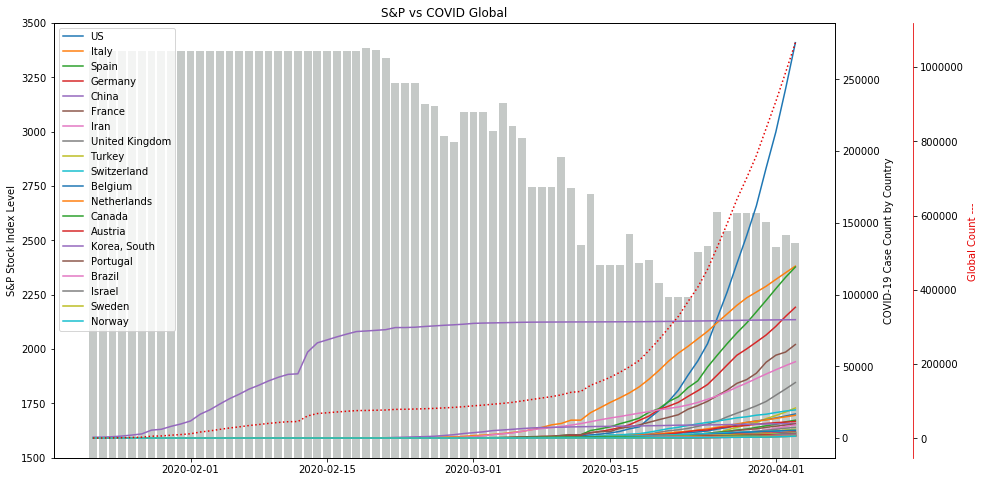

In [5]:
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('S&P vs COVID Global')

ax1.set_ylabel('S&P Stock Index Level')  # we already handled the x-label with ax1
ax1.set(ylim=[1500, 3500]) 
ax1.bar(merged_df.index, merged_df['Close'], color='xkcd:silver')

ax2 = ax1.twinx()
ax2.set_ylabel('COVID-19 Case Count by Country')  # we already handled the x-label with ax1
lines = ax2.plot(merged_df.index, merged_df[merged_df.columns[0:50]])
for c,line in enumerate(lines[0:20]):
    line.set_label(merged_df.columns[c])
ax2.legend(loc='upper left')

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.1))
ax3.spines["right"].set_color('xkcd:red')
ax3.set_ylabel('Global Count --- ', color='xkcd:red')  
ax3.plot(merged_df.index, merged_df['Global'], color='xkcd:red', linestyle=':')
plt.show()


2020-01-22     555
2020-01-23     654
2020-01-24     941
2020-01-25    1434
2020-01-26    2118
dtype: int64

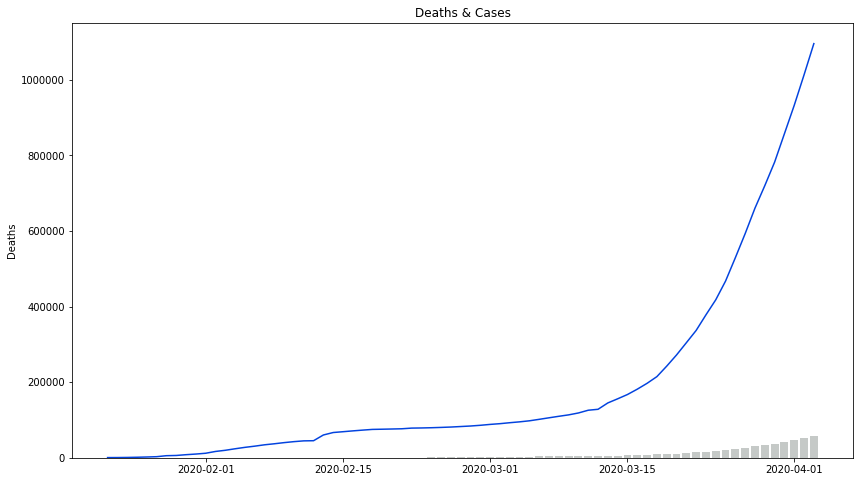

In [6]:
# more overlays -- lets try -- deaths bar, cases line1
dfd_gt = dfd_g.transpose() 
dfc_gt = dfc_g.transpose()

#plotting overlays fun 
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('Deaths & Cases')

dfc_gsum = dfc_g.sum(axis=1)
dfd_gsum = dfd_g.sum(axis=1)
display(dfc_gsum.head())

ax1.set_ylabel('Deaths')  # we already handled the x-label with ax1
ax1.bar(dfd_gsum.index, dfd_gsum, color='xkcd:silver')
ax1.plot(dfc_gsum.index, dfc_gsum, color='xkcd:blue')

# ax2 = ax1.twinx()
# ax2.set_ylabel('COVID-19 Case Count by Country')  # we already handled the x-label with ax1
# lines = ax2.plot(merged_df.index, merged_df[merged_df.columns[0:50]])
# for c,line in enumerate(lines[0:20]):
#     line.set_label(merged_df.columns[c])
# ax2.legend(loc='upper left')

plt.show()


## Countries experiencing high counts recently..

I'm curious where else the virus is catching fire...


In [7]:
dfd_g2 = dfd_g.tail(30).transpose()
dfc_g2 = dfc_g.tail(30).transpose()
display('top 15 countries', dfc_g2.sort_values(by=[dfc_g2.columns[-1]], ascending=False).head(30).iloc[:,-15:])

'top 15 countries'

,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03
Country/Region,,,,,,,,,,,,,,,
US,19100,25489,33276,43847,53740,65778,83836,101657,121478,140886,161807,188172,213372,243453,275586
Italy,47021,53578,59138,63927,69176,74386,80589,86498,92472,97689,101739,105792,110574,115242,119827
Spain,20410,25374,28768,35136,39885,49515,57786,65719,73235,80110,87956,95923,104118,112065,119199
Germany,19848,22213,24873,29056,32986,37323,43938,50871,57695,62095,66885,71808,77872,84794,91159
China,81250,81305,81435,81498,81591,81661,81782,81897,81999,82122,82198,82279,82361,82432,82511
France,12758,14463,16243,20123,22622,25600,29551,33402,38105,40708,45170,52827,57749,59929,65202
Iran,19644,20610,21638,23049,24811,27017,29406,32332,35408,38309,41495,44605,47593,50468,53183
United Kingdom,4014,5067,5745,6726,8164,9640,11812,14745,17312,19780,22453,25481,29865,34173,38689
Turkey,359,670,1236,1529,1872,2433,3629,5698,7402,9217,10827,13531,15679,18135,20921


## Random analysis of various countries

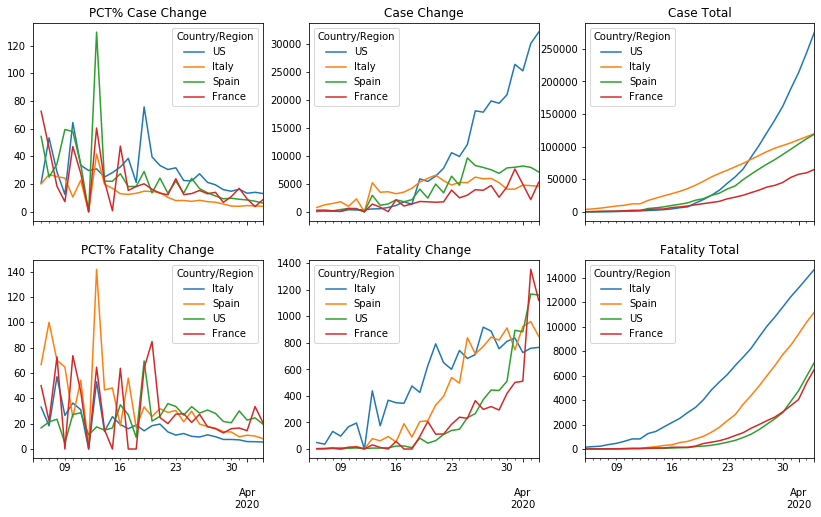

In [8]:
# ad hoc overlays
fig, axs = plt.subplots(2,3, figsize=(14, 8), sharex=True)

pctline = dfc_g2[dfc_g2.index.isin(['Italy','US','Spain','France'])].pct_change(axis=1).transpose().mul(100).plot(ax=axs[0,0], title='PCT% Case Change')
chgline = dfc_g2[dfc_g2.index.isin(['Italy','US','Spain','France'])].diff(axis=1).transpose().plot(ax=axs[0,1], title='Case Change')
actline = dfc_g2[dfc_g2.index.isin(['Italy','US','Spain','France'])].transpose().plot(ax=axs[0,2], title='Case Total')

pctline = dfd_g2[dfd_g2.index.isin(['Italy','US','Spain','France'])].pct_change(axis=1).transpose().mul(100).plot(ax=axs[1,0], title='PCT% Fatality Change')
chgline = dfd_g2[dfd_g2.index.isin(['Italy','US','Spain','France'])].diff(axis=1).transpose().plot(ax=axs[1,1], title='Fatality Change')
actline = dfd_g2[dfd_g2.index.isin(['Italy','US','Spain','France'])].transpose().plot(ax=axs[1,2], title='Fatality Total')
plt.show()

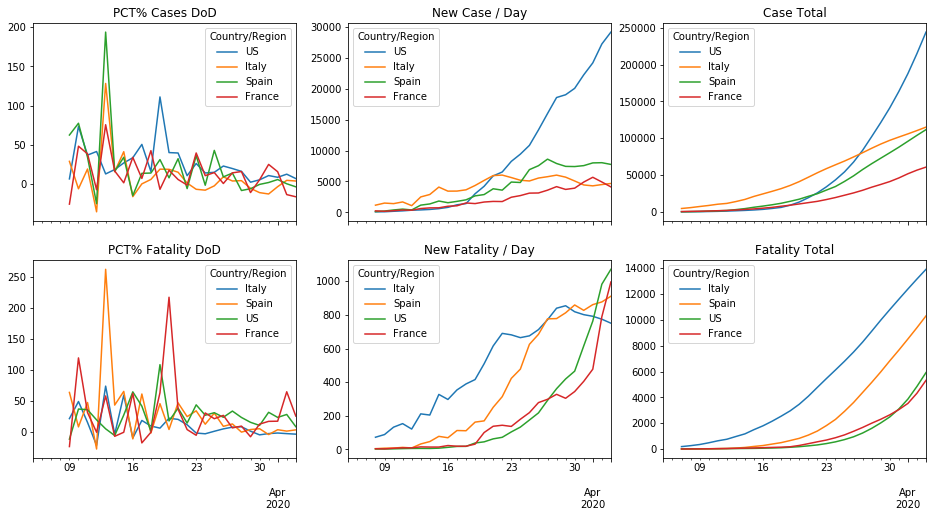

In [9]:
# rolling 3 day to smooth out 
countries = ['France','Italy','US','Spain']
numdays = 45

fig, axs = plt.subplots(2,3, figsize=(16, 8), sharex=True, )

dfd_g2r = dfd_g2.rolling(window=3, axis=1).mean()
dfc_g2r = dfc_g2.rolling(window=3, axis=1).mean()
# dfd_g2r = dfd_g2
# dfc_g2r = dfc_g2

# display('raw day',dfd_g2.transpose()[countries].tail(50))
# display('raw day diff',dfd_g2.transpose().diff()[countries].tail(50))
# display('raw day diff pct%',dfd_g2.transpose().pct_change()[countries].tail(25))
# display('raw daily pct%',dfd_g2.transpose().diff().pct_change()[countries].tail(25))
# display('3r day diff',dfd_g2r.transpose().diff()[countries].tail(25))
# display('3r day diff pct%',dfd_g2r.transpose().pct_change()[countries].tail(25))
# display('3r daily pct%',dfd_g2r.transpose().diff().pct_change()[countries].tail(25))

pctline = dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(numdays).mul(100).plot(ax=axs[0,0], title='PCT% Cases DoD')
chgline = dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).transpose().tail(numdays).plot(ax=axs[0,1], title='New Case / Day')
actline = dfc_g2r[dfc_g2r.index.isin(countries)].transpose().tail(numdays).plot(ax=axs[0,2], title='Case Total')

#unfortunately the labels/colors get changed since i'm sorting by rank ?
pctline = dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(numdays).mul(100).plot(ax=axs[1,0], title='PCT% Fatality DoD')
chgline = dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).transpose().tail(numdays).plot(ax=axs[1,1], title='New Fatality / Day')
actline = dfd_g2r[dfd_g2r.index.isin(countries)].transpose().tail(numdays).plot(ax=axs[1,2], title='Fatality Total')
plt.show()

Country/Region,Italy,US
2020-03-25,74386,65778
2020-03-26,80589,83836
2020-03-27,86498,101657
2020-03-28,92472,121478
2020-03-29,97689,140886
2020-03-30,101739,161807
2020-03-31,105792,188172
2020-04-01,110574,213372
2020-04-02,115242,243453
2020-04-03,119827,275586


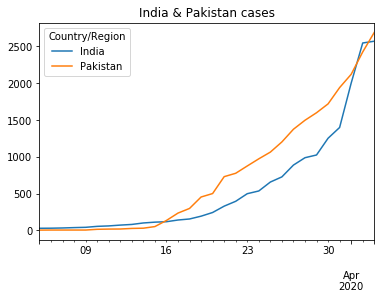

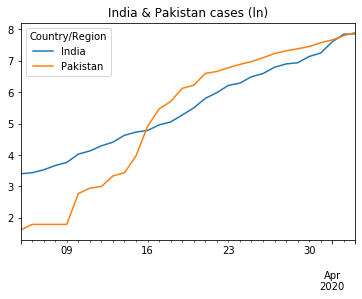

In [10]:
dfc_g[['India','Pakistan']].tail(30).plot(title='India & Pakistan cases')
dfc_g[['India','Pakistan']].apply(np.log).tail(30).plot(title='India & Pakistan cases (ln)')

display(dfc_g[['Italy','US']].tail(10))

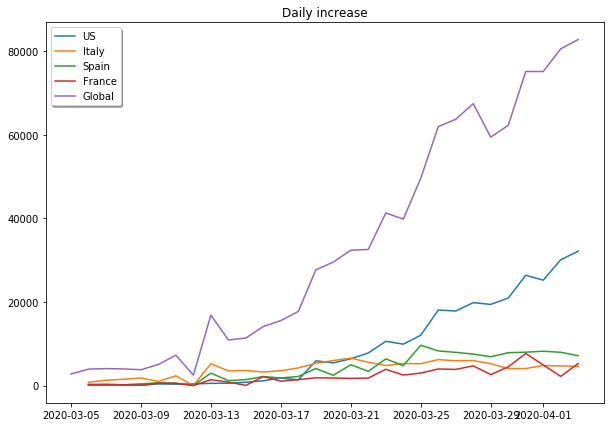

2020-03-30    62248.0
2020-03-31    75122.0
2020-04-01    75118.0
2020-04-02    80552.0
2020-04-03    82760.0
dtype: float64

Country/Region,US,Italy,Spain,France
2020-03-30,20921.0,4050.0,7846.0,4462.0
2020-03-31,26365.0,4053.0,7967.0,7657.0
2020-04-01,25200.0,4782.0,8195.0,4922.0
2020-04-02,30081.0,4668.0,7947.0,2180.0
2020-04-03,32133.0,4585.0,7134.0,5273.0


In [11]:
# global rate
dfc_gdiff= dfc_g.transpose().sum().diff()

plt.figure(figsize=(10,7)) 
plt.plot(dfc_g2[dfc_g2.index.isin(['Italy','US','Spain','France'])].diff(axis=1).transpose().tail(30))
plt.plot(dfc_gdiff.tail(30))
plt.legend(('US','Italy','Spain','France','Global'), loc='upper left', shadow=True)  # bit of pain to name these manually in order
plt.title('Daily increase')
# plt.legend(bbox_to_anchor=(.01, .99), loc='upper left', borderaxespad=0.)

plt.show()
display(dfc_gdiff.tail(5))
display(dfc_g2[dfc_g2.index.isin(['Italy','US','Spain','France'])].diff(axis=1).transpose().tail(5))


In [12]:
# just the top countries by growth % (how do i trunc these silly timestamp headers...)
dfc_g3 = dfc_g2.diff(axis=1)
dfc_g3.columns = pd.to_datetime(dfc_g3.columns)
dfc_g3p = dfc_g2.pct_change(axis=1).mul(100).round()
dfc_g3p.columns = pd.to_datetime(dfc_g3p.columns)

dfc_merge = pd.merge(left=dfc_g2, right=dfc_g3p, left_index=True, right_index=True, suffixes=('',' %chg'))
# weird it goes to timestamp now
dfc_merge = dfc_merge.reindex(sorted(dfc_merge.columns), axis=1)
dfc_merge = dfc_merge[dfc_merge[dfc_merge.columns[-2]] > 100]

display('top 20 growth countries, > 100 cases', 
        dfc_merge.sort_values(by=dfc_merge.columns[-1], ascending=False).head(20).iloc[:,-6:].rename(columns=lambda x: x.replace('00:00:00','').replace('2020-','')))


'top 20 growth countries, > 100 cases'

,04-01,04-01 %chg,04-02,04-02 %chg,04-03,04-03 %chg
Country/Region,,,,,,
Cameroon,233,21.0,306,31.0,509,66.0
Serbia,1060,18.0,1171,10.0,1476,26.0
United Arab Emirates,814,23.0,1024,26.0,1264,23.0
Niger,74,174.0,98,32.0,120,22.0
Kuwait,317,10.0,342,8.0,417,22.0
Montenegro,123,13.0,144,17.0,174,21.0
West Bank and Gaza,134,13.0,161,20.0,194,20.0
Ukraine,794,23.0,897,13.0,1072,20.0
Algeria,847,18.0,986,16.0,1171,19.0


,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03
Country/Region,,,,,,,,,,
US,10834.0,13330.0,15972.0,18567.0,19017.0,20050.0,22231.0,24162.0,27215.0,29138.0
Spain,6916.0,7550.0,8611.0,7907.0,7441.0,7412.0,7563.0,8003.0,8036.0,7759.0
Germany,4150.0,4961.0,5962.0,6791.0,6052.0,5338.0,4704.0,5259.0,5970.0,6450.0
Italy,5083.0,5554.0,5774.0,6029.0,5700.0,5080.0,4440.0,4295.0,4501.0,4678.0
United Kingdom,1298.0,1695.0,2194.0,2557.0,2656.0,2569.0,2723.0,3362.0,3907.0,4403.0
France,3119.0,3143.0,3593.0,4168.0,3719.0,3923.0,4907.0,5680.0,4920.0,4125.0
Iran,1793.0,2119.0,2507.0,2797.0,2968.0,3054.0,3066.0,3095.0,2991.0,2859.0
Turkey,399.0,700.0,1275.0,1656.0,1863.0,1710.0,2043.0,2154.0,2436.0,2463.0
Belgium,512.0,831.0,1005.0,1399.0,1534.0,1538.0,1214.0,1043.0,1150.0,1332.0


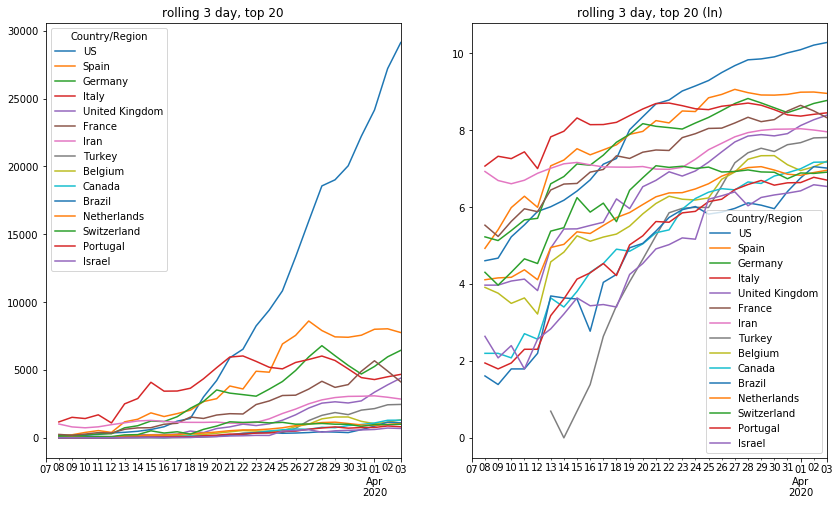

In [13]:
# rolling 3 day average highs
fig, axs = plt.subplots(1,2)

df_roll = dfc_g3.rolling(3,axis=1,center=False).mean().round()
df_roll = df_roll.sort_values(by=[df_roll.columns[-1]], ascending=False).head(15)
display(df_roll.iloc[:,-10:])
df_roll.iloc[:,-28:].transpose().plot(figsize=(14,8),title='rolling 3 day, top 20',ax=axs[0])
df_roll.iloc[:,-28:].transpose().apply(np.log).plot(figsize=(14,8),title='rolling 3 day, top 20 (ln)',ax=axs[1])



# Global Heatmap (Using Shape Files)


I wanted to map by country, but need to find a country equivalent of a FIPS code (or match by country name to a map file).

Another way is to use GPS (Long/Lat) geocordinates and a Map (shape file).   However my global data is sometimes clumped into one lat/long for some countrues like Japan and US, and detailed locations in places like France.

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,last
107,France,3.9339,-53.1258,0,0,0,0,0,0,0,...,28,28,28,28,43,43,51,51,57,57
108,France,-17.6797,149.4068,0,0,0,0,0,0,0,...,30,30,30,30,36,36,37,37,39,39
109,France,16.2500,-61.5833,0,0,0,0,0,0,0,...,73,73,102,106,106,114,125,128,130,130
110,France,-12.8275,45.1662,0,0,0,0,0,0,0,...,36,50,63,63,82,94,94,116,128,128
111,France,-20.9043,165.6180,0,0,0,0,0,0,0,...,14,15,15,15,15,16,16,18,18,18
112,France,-21.1351,55.2471,0,0,0,0,0,0,0,...,135,145,183,183,224,247,281,308,321,321
113,France,17.9000,-62.8333,0,0,0,0,0,0,0,...,3,5,5,5,6,6,6,6,6,6
114,France,18.0708,-63.0501,0,0,0,0,0,0,0,...,11,11,11,11,15,15,15,22,22,22
115,France,14.6415,-61.0242,0,0,0,0,0,0,0,...,66,81,93,93,93,128,135,138,143,143
116,France,46.2276,2.2137,0,0,2,3,3,3,4,...,29155,32964,37575,40174,44550,52128,56989,59105,64338,64338


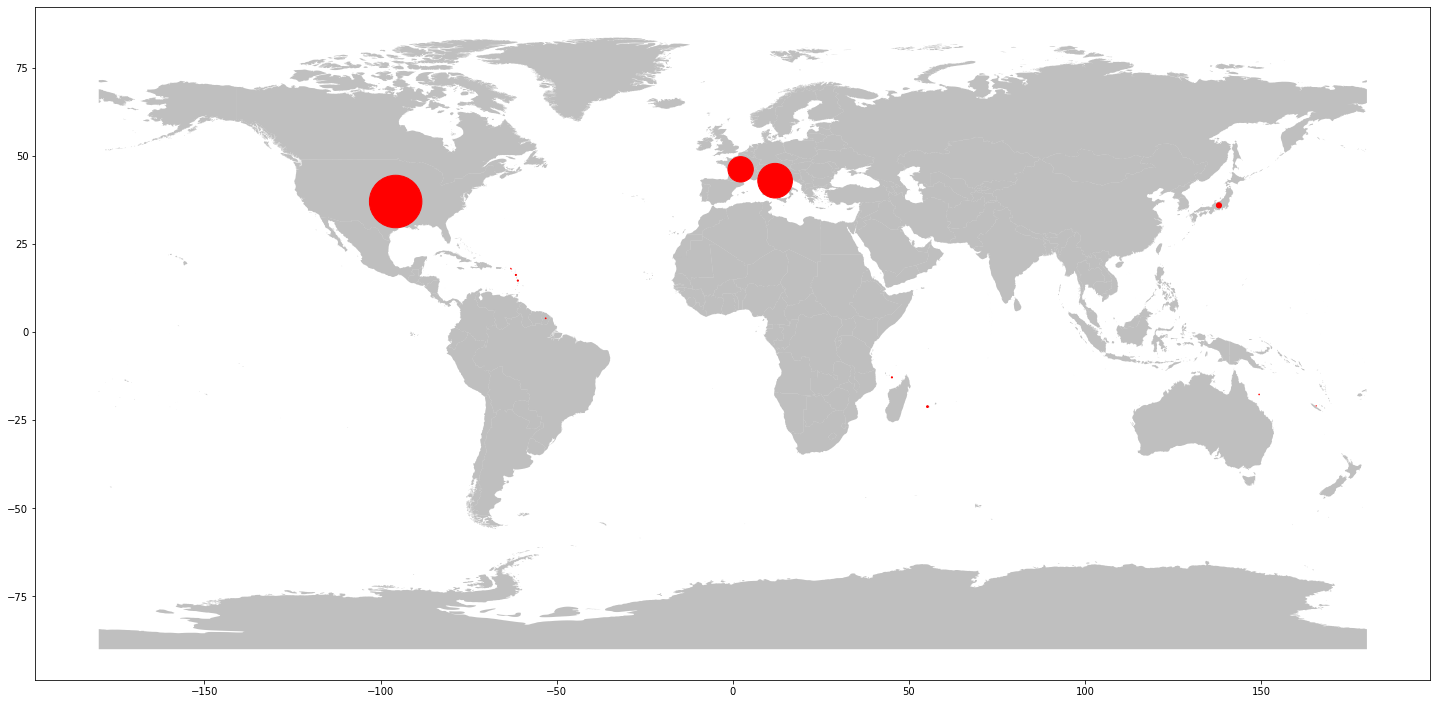

In [14]:
# country shape file https://hub.arcgis.com/datasets/UIA::uia-latitude-longitude-graticules-and-world-countries-boundaries?geometry=-144.961%2C-72.317%2C-179.414%2C79.981&layer=1
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

gmap = gpd.read_file('maps/Countries_WGS84.shp')

# remove hi/ak for now
dfc_geo = dfc_graw.drop(columns=['Province/State'])
dfc_geo['last'] = dfc_geo[dfc_geo.columns[-1]]
dfc_geo = dfc_geo[dfc_geo['Country/Region'].isin(['US','Italy','Japan','France'])]
display(dfc_geo)


geometry = [Point(xy) for xy in zip(dfc_geo["Long"],dfc_geo["Lat"]) ] 
geo_df = gpd.GeoDataFrame(dfc_geo,crs={"init": "EPSG:7030"},geometry=geometry)
geo_df = geo_df[['Country/Region','last','geometry']]

fig, ax = plt.subplots(figsize=(25,25))
gmap.plot(ax=ax, alpha=0.5, color='grey')

#geo_df.plot(ax=ax, markersize=20, cmap='Reds', label='cases')
geo_df.plot(ax=ax, markersize=dfc_geo['last'].div(100), color='red', label='cases')   # size on last
